# Graph Neural Networks CoSyNe Workshop Tutorial 2025

## Introduction

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/depasquale-lab/cosyne-2025-gnn-workshop/blob/main/GNN_Workshop_CoSyNe_2025_tutorial.ipynb)

<img src="https://i.imgflip.com/4fz7yy.jpg?a483696" alt="My Image" width="500" height="300">


**Authors:**
[Brian DePasquale](https://briandepasquale.github.io/), [Kim Stachenfeld](https://neurokim.com/), [Sam Lewallen](https://scholar.google.com/citations?user=f17bjxcAAAAJ&hl=en).

Credit to Matthew Morris and Marianne Abemgnigni for a helpful GNN tutorial in [Jraph](https://github.com/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Graph_Neural_Networks/Graph_Neural_Networks.ipynb) and Ishani Ganguly and Ashok Litwin-Kumar for their helpful tutorial on GNNs for [connectomes](https://github.com/alitwinkumar/connectome_examples/blob/main/gnn_tutorial.ipynb).

Welcome! We hope you are enjoying our 2025 CoSyNe Workshop [*IT’S ALL CONNECTED!
 Graph approaches to geometric complexity in neuroscience*](https://sites.google.com/bu.edu/gnnworkshop-cosyne2025/home).

This tutorial is a guided walk through of Graph Neural Networks (GNNs) and what they can do. The study and use of GNNs in ML and biology has been strong recently, and we were motivated to organize this workshop and tutorial to expose the Cosyne community to their potential. GNNs are a class of deep learning models designed to process graph-structured data, where nodes represent individual elements of a complex system and edges represent the relationship between nodes. GNNs work by iteratively aggregating information from a node's neighbors, enabling the model to learn node or graph-level representations. They have been successfully applied to various tasks, such as node classification, link prediction, and graph classification, in neuroscience relevant domains such as protein-chemical interactions, functional neural connectivity, biomechanics, collective dynamics, and connectomics! 🚀

**Aims & Learning Objectives of this tutorial:**
- Understand the theory behind graphs and GNNs
- Learn how to use PyTorch Geometric, a powerful library for training GNNs
- Implement two kinds of GNNs and learn their unique properties
- Apply GNNs to connectomics data from FlyWire to predict the properties of neurons based on their neighbors.

**Prerequisites:**

- Some familiarity with PyTorch and Python
- Neural network basics
- Graph theory and GNN basics (e.g., check out MIT Open Courseware [slides](https://ocw.mit.edu/courses/1-022-introduction-to-network-models-fall-2018/resources/mit1_022f18_lec2/) by Amir Ajorlou or [Theoretical Foundations of Graph Neural Networks](https://www.youtube.com/watch?v=uF53xsT7mjc&) by Petar Veličković)

<font color='red'> **FIRST THINGS FIRST: IF YOU HAVEN'T ALREADY, MAKE A COPY OF THIS COLAB TO YOUR OWN PERSONAL GOOGLE DRIVE**</font>

<font color='red'> **How to use this tutorial: The code for completing this tutorial, from top to bottom, is almost entirely here. But we have listed a few spots where we left "questions", which is an invitation for you to try something on your own, if you want. Of course the code is right there, but don't peak if you don't want to! There is an opportunity at the very end to do some original work as well.** </font>

**Main Outline:**

1. Getting set up (downloading data and libraries)
2. Getting warmed up with some basic analyses (looking at data and graphs)
3. GNN basics: message passing and aggregation
4. Different types of tasks for GNNs
5. Intro to the `PyTorch Geometric` library
6. Graph Convolutional Network (GCN) and Graph Attention Network (GAT)
7. Some related graph analyses to provide context for our GNN results
8. Extra credit for the highy motivated!

**Before you start:**

1. You can use a GPU to speed up training. However, it is not necessary: it will run fine on the CPU. To do this, go to the "Runtime" menu in Colab, select "Change runtime type" and then in the popup menu, choose "GPU" in the "Hardware accelerator" box.

# Setting up (downloading libraries and data) and imports

You may want to use a GPU runtime to accelerate model training. This will accelerate training time, but will use up your free GPU colab credits. If so, go to:

Runtime > Change Runtime > T4 GPU

First, we need to install the [PyTorch Geometric library](https://pytorch-geometric.readthedocs.io/en/latest/). PyTorch Geometric (PyG) is a library built on top of PyTorch, designed to easily implement and experiment with Graph Neural Networks (GNNs). It provides efficient tools for working with graph-structured data, including layers for convolution, pooling, and graph attention. PyG is widely used for tasks like node classification, graph classification, and link prediction, offering a flexible and scalable framework for graph-based machine learning models.

<font color='red'>Run the cell below to download the package</font>

In [5]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00


And then let's install some standard python packages

<font color='red'>Run the cell below to import the packages.</font>

In [1]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next, let's download the data we will be analyzing. There are six files to download. 2 files are correctly organized connectome data for two brain regions from the [FlyWire dataset](https://flywire.ai/). The 4 other files are the raw data for each brain region, which we will use to explore some properties of the data that are not caputred in the graph organized data.

<font color='red'>Run the cell below to download the data.</font>

In [3]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=11R8XPhpKOt4XOhBsd1RZwC7tWx8Mg5P9' -O GNG_graph.pt
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1O8cI49xZ_5qSj-W07CNTWXQGxFYgeS_0' -O SMP_R_graph.pt
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1dxxm9fvI9H3O5wixCa_XtvQ1HsG57Why' -O connections_GNG.csv
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1caFNoy0s87s801-roPYP02Tpwgxm976K' -O neurons_GNG.csv
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1bSFyRUuNbc983XGTpU9Iw7uci__4QbOI' -O connections_SMP_R.csv
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1AFuFGkUfo175S-xaUmhmu9vfIAI25wFN' -O neurons_SMP_R.csv

--2025-04-01 14:34:11--  https://drive.google.com/uc?export=download&id=11R8XPhpKOt4XOhBsd1RZwC7tWx8Mg5P9
Resolving drive.google.com (drive.google.com)... 74.125.137.139, 74.125.137.113, 74.125.137.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=11R8XPhpKOt4XOhBsd1RZwC7tWx8Mg5P9&export=download [following]
--2025-04-01 14:34:11--  https://drive.usercontent.google.com/download?id=11R8XPhpKOt4XOhBsd1RZwC7tWx8Mg5P9&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3495600 (3.3M) [application/octet-stream]
Saving to: ‘GNG_graph.pt’

GNG_graph.pt        100%[===================>]   3.33M  --.-KB/s

# The basics

Let's first formalize what a graph is, examine our data, and take a look at some basic properties of each graph.

## What is a graph?

A graph is a collection of nodes connected by edges. Nodes contains *features* which are properties of each node. Edges indicate some kind of interaction between the connected nodes.

In the picture below, 4 nodes form a graph. Edge $e_{ij}$ connects node $i$ and $j$. The features of node $i$ are describes by a vector $v_i$.

Node features can describe properties of individual parts of a thing: e.g., properties of a neuron like cell type, properties of an atom, or position of an animal moving as a collective.

Edges can have features too (red arrays), but we won't discuss that extensively here. Also, an entire graph can have features (green array) but we also won't discuss that extensively in this tutorial. An edge feature could be if two atoms have a bond, if two aniamls influence each other, or if two neurons influence each other. A graph feature describes something about the whole graph, e.g., a subject's age (if nodes are brain ROIs), isomolarity (if nodes are atoms), or behavioral context, like fed/hungry (if nodes are individual animals).

Wow are graphs descriptive! See!

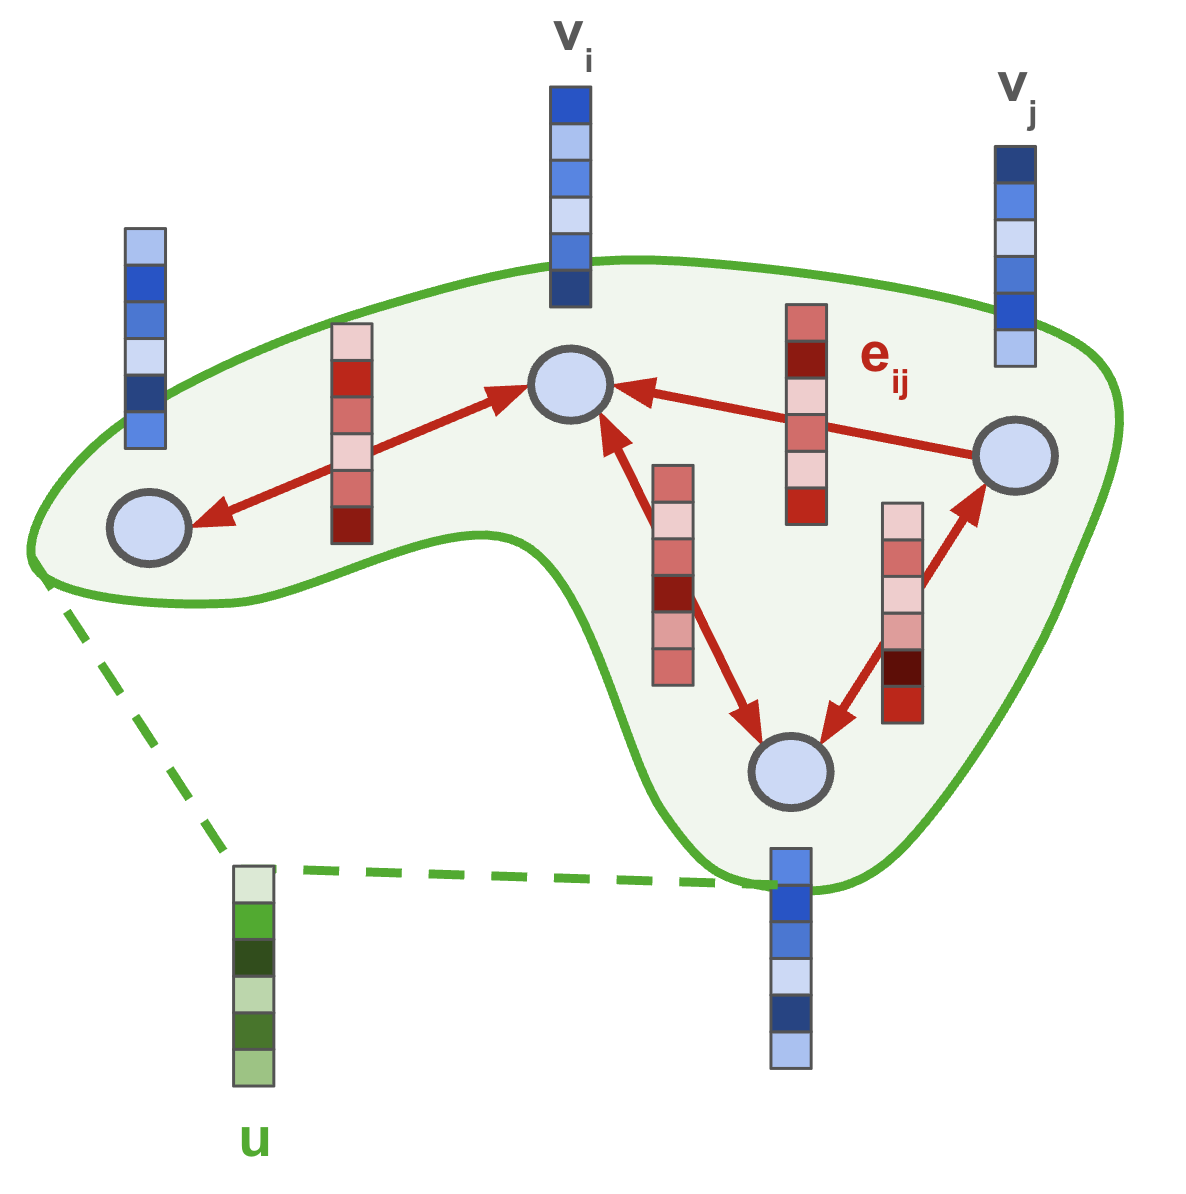

*Image Source: Kim!*

## Dataset 1 -- superior medial protocerebrum (SMP)

The two regions we will be examining data from are the [Gnathal Ganglia (GNG)](https://codex.flywire.ai/app/neuropils?selected=GNG) and the [Right Superior Medial Protocerebrum (SMP_R)](https://codex.flywire.ai/app/neuropils?selected=SMP_R).

The first connectome we will explore is from the superior medial protocerebrum. It will become clear later why we are looking at this region.

The superior medial protocerebrum is a region of the insect brain involved in processing sensory information, particularly from the eyes and antennae, and coordinating complex behaviors. It plays a key role in sensory integration, motor control, and higher-order functions like learning and memory. This region is crucial for behaviors such as movement, orientation, and navigation, and is studied to understand neural circuits and synaptic plasticity in arthropods.  It is often compared to the midbrain or forebrain in vertebrates, as both regions are involved in sensory processing and behavioral control.

### Raw data

Let's first load the raw data as provided by [FlyWire](https://codex.flywire.ai/api/download). Please be sure to use this data responsibly. The data you will use here are more or less as you would find it if you downloaded it from FlyWire, but they have been organized by brain region, and some details have been removed to keep it simple.

<font color='red'>Run the 2 cells below to load the connection and neuron feature data for the SMP and to view the data in a dataframe.</font>

In [ ]:
connections_SMP = pd.read_csv('connections_SMP_R.csv')
connections_SMP

pre_root_id        post_root_id neuropil  syn_count nt_type
0      720575940633587552  720575940626452879    SMP_R       15.0     ACH
1      720575940634042012  720575940623989577    SMP_R        9.0    GLUT
2      720575940611430513  720575940613540350    SMP_R        6.0    GLUT
3      720575940630732414  720575940611428977    SMP_R       10.0     ACH
4      720575940645864739  720575940612210351    SMP_R       26.0    GLUT
...                   ...                 ...      ...        ...     ...
69316  720575940624694503  720575940645673508    SMP_R        3.0    GABA
69317  720575940620519083  720575940632131740    SMP_R        2.0     SER
69318  720575940632690623  720575940636344824    SMP_R        2.0     ACH
69319  720575940614348962  720575940626778008    SMP_R        4.0     ACH
69320  720575940619863125  720575940630577403    SMP_R        6.0    GABA

[69321 rows x 5 columns]

By definition, all `neuropil` from this brain region has the label `SMP_R`. We can see the neurotransmitter type, the synpase count, etc. for each synapse.

In [ ]:
neurons_SMP = pd.read_csv('neurons_SMP_R.csv')
neurons_SMP

root_id       flow super_class        class sub_class  \
0     720575940633771033  intrinsic     central          NaN       NaN   
1     720575940620922790  intrinsic     central          DAN       NaN   
2     720575940626983185  intrinsic     central          NaN       NaN   
3     720575940616747934  intrinsic     central          NaN       NaN   
4     720575940633716124  intrinsic     central          NaN       NaN   
...                  ...        ...         ...          ...       ...   
6287  720575940622462472  intrinsic     central  Kenyon_Cell       NaN   
6288  720575940626646544  intrinsic     central  Kenyon_Cell       NaN   
6289  720575940615077482  intrinsic     central          NaN       NaN   
6290  720575940626321482  intrinsic     central  Kenyon_Cell       NaN   
6291  720575940611090244  intrinsic     central       LHCENT       NaN   

     cell_type hemibrain_type        hemilineage   side nerve  
0          NaN         SMP477  DM1_antero_dorsal   left   NaN  
1          NaN          PAM05       CREa1_dorsal  right   NaN  
2       CB3695            NaN              FLAa3  right   NaN  
3       CB1508            NaN             SMPpv1  right   NaN  
4          NaN         SMP033             SLPal5  right   NaN  
...        ...            ...                ...    ...   ...  
6287      KCab         KCab-m               MBp3  right   NaN  
6288      KCab         KCab-s               MBp2  right   NaN  
6289       NaN         SMP093             SMPad1   left   NaN  
6290       NaN          KCg-m               MBp2  right   NaN  
6291       NaN        LHCENT8            primary  right   NaN  

[6292 rows x 10 columns]

In the `neurons_SMP` dataframe, we can see information for each neuron in the SMP. We won't be working with much of this information. Each neuron has a few labels that are related to a hierarhical classification scheme used to label each neuron. From the FlyWire webpage:

* **Flow** Top hierarchical annotation describing signal flow of this neuron.
* **Super Class** Broadest hierarchical annotation below “flow”.
* **Class & Sub Class** Provides useful labels for small to medium-sized groups of neurons and sits between superclass and cell type.
* **Side** Soma side of the neuron in fly's perspective. Note: corrected for the left/right inversion of the FAFB image data (see FAQ page for details).
* **Nerve** Nerve through which the neuron is entering/exiting the nervous system.
* **Hemilineage** Developmental (hemi-)lineage, can contain multiple cell types that are often morphologically similar.

The important feature for us is the `super_class` label. We will use this as a node feature, and try to learn this feature from adjacent nodes.

<font color='red'>Run the cell below to check out the number of examples for each superclass label in the SMP data.</font>

In [ ]:
neurons_SMP['super_class'].value_counts()

super_class
central               6045
descending              72
visual_projection       59
ascending               42
endocrine               41
visual_centrifugal      33
Name: count, dtype: int64

What do these `super_class` labels mean? These labels were selected by the FlyWire team to indicate function or other property of the cell. The complete list of labels are:

* optic
* central
* sensory
* visual_projection
* ascending
* descending
* visual_centrifugal
* motor
* endocrine

According to FlyWire, sensory, ascending, descending and visual projection neurons were identified by the [Jefferis Lab](https://flybrain.mrc-lmb.cam.ac.uk/jefferislabwebsite/). The remaining neurons were assigned to the central brain if they had more than 100 connections in the central brain (vs the optic lobe), and to the optic lobe otherwise.

Consistent with the SMP being a central brain reion, it sure does have lots of central neurons!

### Graph-structured data

Although looking at the raw data can be helpful, wrangling it in to the right format for using with a GNN seems annoying and hard. Lucky for you we already did it! We organized the very same SMP raw data into a strucutre data type called [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.data.Data.html) that PyG likes.


<font color='red'>Run the cell below to load graph structured data for SMP.</font>


In [6]:
graph_SMP = torch.load('SMP_R_graph.pt', weights_only=False)
graph_SMP

Data(edge_index=[2, 69321], edge_attr=[69321, 1], num_nodes=6292, y=[6292], x=[6292, 6], train_mask=[6292], val_mask=[6292], test_mask=[6292])

Printing the graph, we can see it's basic properties

*   `edge_index`: a `2xnum_edges` torch tensor that describes every connection in the graph
*   `edge_attr`: a `num_edgesx1` torch tensor that describes one feature for each edge (e.g., connecting weight for a synapse). We won't really use this here.
* `num_nodes`: the number of nodes in the graph
* `y`: the class labels for each node. In our case this is the `superclass` of each node, labeled as a multinomial.
* `x`: a `num_nodes x num_node_features` torch tensor. In this totorial, the node feature for each node is a one-hot encoding of the class label, `y`.
* `train_mask`: a boolean torch tensor describing which nodes will be used for training.
* `val_mask`: nodes used for model validation.
* `test_mask`: nodes used for testing.



<font color='red'>PROBLEM 1: Create three variables `num_classes`, `num_features`, and `num_nodes` using properties of the graph and print them.</font>

In [ ]:
num_classes = len(graph_SMP.y.unique())
num_classes

6

In [ ]:
num_features = graph_SMP.x.shape[1]
num_features

6

In [ ]:
num_nodes = graph_SMP.x.shape[0]
num_nodes

6292

### Creating a subgraph and plotting a graph

Our graphs are kind of big! It would be nice to look at it, or at least some part of it. So let's make a smaller subgraph from our graph using pytorch's `subgraph` and `degree` methods.

<font color='red'>Run the cell below to import these two methods.</font>

In [ ]:
from torch_geometric.utils import degree
from torch_geometric.utils import subgraph

A node's degree is the number of incoming or outgoing edges.

<font color='red'>PROBLEM 2: Use `degree` to compute the 'out-degree` (number of outgoing edges) for each node, and print the node degree for all nodes.</font>

In [ ]:
# Calculate the degree of each node (number of connections)
node_degrees = degree(graph_SMP.edge_index[0], num_nodes=graph_SMP.num_nodes)
pd.DataFrame(node_degrees)

0
0     31.0
1      8.0
2     10.0
3     22.0
4     26.0
...    ...
6287   0.0
6288   1.0
6289   1.0
6290   0.0
6291   0.0

[6292 rows x 1 columns]

Let's find some highly-connected nodes and their neighbors to plot.

<font color='red'>Run the cell below to compute the highly connected nodes and their neighbors.</font>


In [ ]:
most_connected_nodes = torch.argsort(node_degrees, descending=True)[:2]

# Use edge_index to find neighbors (target nodes of edges)
neighbors = set()
for node in most_connected_nodes:
    neighbors.update(graph_SMP.edge_index[1, graph_SMP.edge_index[0] == node].tolist())

# Combine most connected nodes with their neighbors
subgraph_nodes = torch.tensor(list(neighbors), dtype=torch.long)

Now, lets create a subgraph using `subgraph`.

<font color='red'>PROBLEM 3: Use [`subgraph`](https://pytorch-geometric.readthedocs.io/en/2.4.0/_modules/torch_geometric/utils/subgraph.html) to compute a subgraph using the nodes you selected. The key output you need is the first output argument, `subgraph_edge_index`.</font>

In [ ]:
# Step 4: Create subgraph by selecting these nodes
subgraph_edge_index, _ = subgraph(subgraph_nodes, graph_SMP.edge_index)
subgraph_edge_index

tensor([[   7,    7,    7,  ..., 6094, 6173, 6242],
        [ 548,   94, 1151,  ...,   35,   35,  134]])

#### NetworkX

Althought PyG is great, it can't do everything. Luckily, [NetworkX](https://networkx.org/) can do lots of that stuff!

NetworkX is a Python library designed for the creation, manipulation, and analysis of complex networks or graphs. It provides tools to work with both undirected and directed graphs, enabling a variety of graph algorithms and operations such as finding shortest paths, centrality measures, and graph visualizations. It is particulary useful for us for graph visualization, which is what we'll use it for.

<font color='red'>Run the cell below to import the necessary library.</font>

In [ ]:
import networkx as nx

NetworkX has lots of handy methods for creating graphs. Let's use [`from_edgelist`](https://networkx.org/documentation/stable/reference/generated/networkx.convert.from_edgelist.html) to create a NetworkX graph from our subgraph edge list.

<font color='red'>Run the cell below to convert PyTorch Geometric graph to NetworkX graph.</font>

In [ ]:
sG_SMP = nx.from_edgelist(subgraph_edge_index.t().tolist())

In [ ]:
print("Number of nodes:", sG_SMP.number_of_nodes())  # Number of nodes
print("Number of edges:", sG_SMP.number_of_edges())  # Number of edges

Number of nodes: 935
Number of edges: 5569


Finally, let's plot the subgraph using the awesomeness of NetworkX.

<font color='red'>PROBLEM 4: use [`nx.draw`](https://networkx.org/documentation/stable/reference/drawing.html) to draw the subgraph</font>:

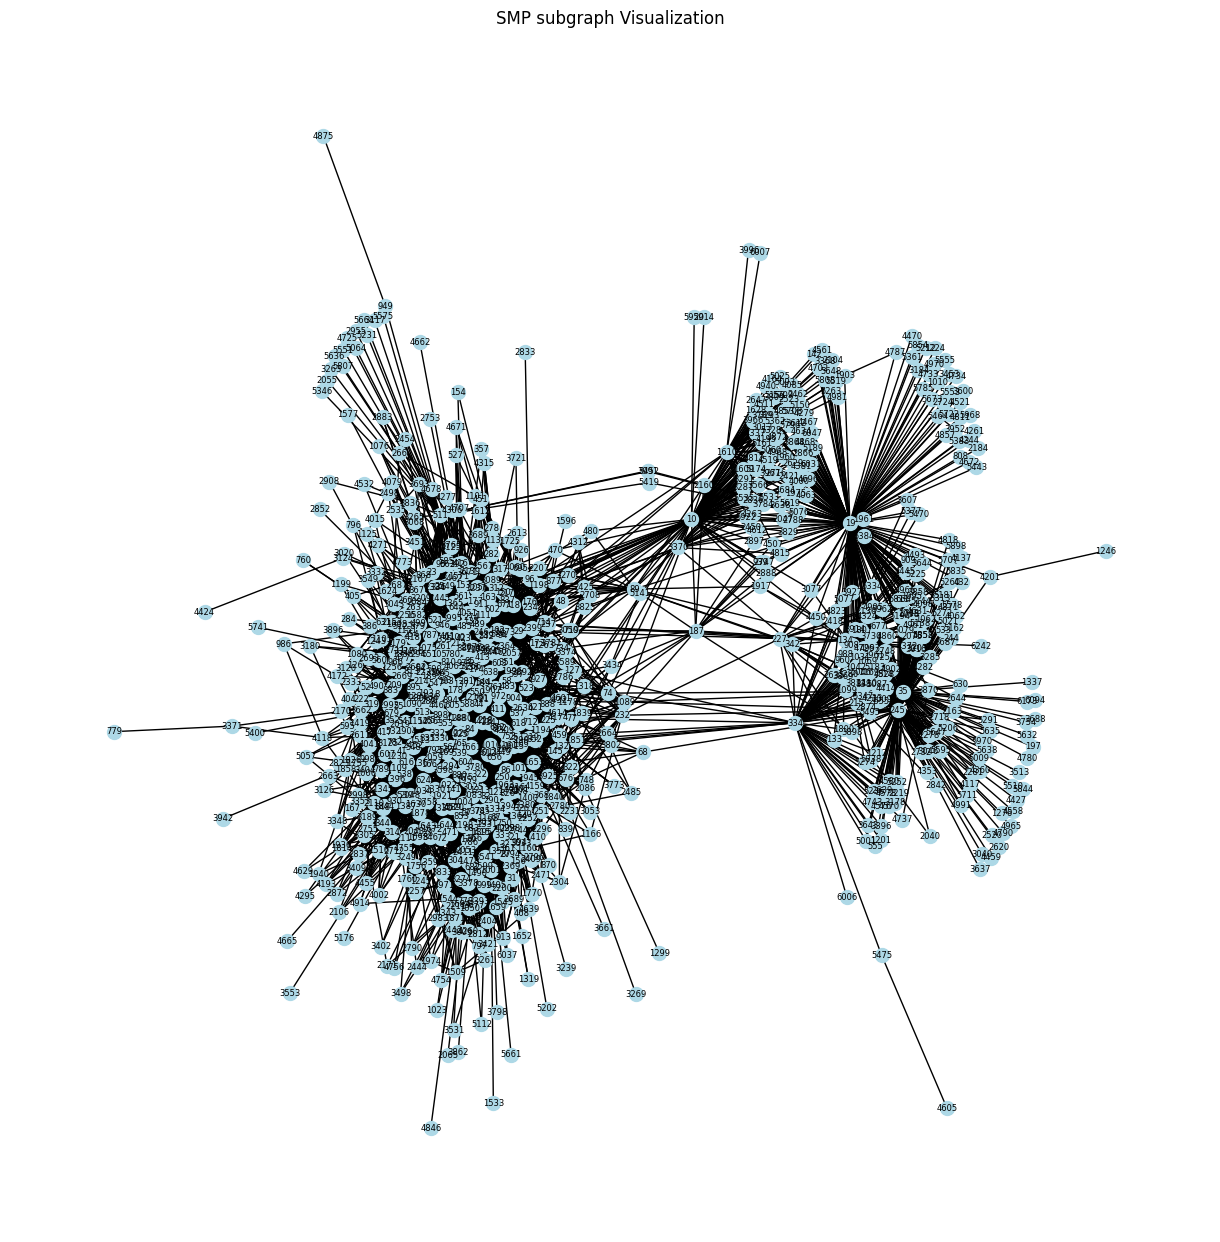

In [ ]:
plt.figure(figsize=(12, 12))
nx.draw(sG_SMP, with_labels=True, node_size=100, node_color='lightblue', font_size=6)
plt.title("SMP subgraph Visualization")
plt.show()

## Dataset 2 -- Gnathal Ganglia (GNG)

Let's do the same kind of analysis but for a different brain region. The second region we will examine is the [Gnathal Ganglia (GNG)](https://codex.flywire.ai/app/neuropils?selected=GNG).

In Drosophila, the gnathal ganglion is a portion of the subesophageal ganglion, located near the fly's mouthparts. It plays a crucial role in controlling the movements of the fly's labium, mandibles, and maxillae, which are involved in feeding and grooming behaviors. The gnathal ganglion processes sensory information and coordinates motor responses that regulate feeding, chewing, and other oral functions essential for the fly's survival.

<font color='red'>PROBLEM 5: Re-do the analyses we did on the SMP, but now on the GNG. It's not critical to re-do each thing, step by step, but, looking at a subgraph of the GNG and the feature labels of the GNG dataset seem worthwhile.</font>

In [ ]:
neurons_GNG = pd.read_csv('neurons_GNG.csv')
neurons_GNG['super_class'].value_counts()

super_class
central               4703
sensory               1981
ascending             1892
descending            1190
visual_centrifugal     135
motor                  100
visual_projection       75
Name: count, dtype: int64

Given the GNG's function, described above, it's not surprising it has a greater variety of cell types, but it still has lots of central neurons too, like the SMP!

In [ ]:
graph_GNG = torch.load('GNG_graph.pt', weights_only=False)

In [ ]:
# Calculate the degree of each node (number of connections)
node_degrees = degree(graph_GNG.edge_index[0], num_nodes=graph_GNG.num_nodes)

most_connected_nodes = torch.argsort(node_degrees, descending=True)[:2]

# Step 3: Get neighbors of these nodes
# Use edge_index to find neighbors (target nodes of edges)
neighbors = set()
for node in most_connected_nodes:
    neighbors.update(graph_GNG.edge_index[1, graph_GNG.edge_index[0] == node].tolist())

# Combine most connected nodes with their neighbors
subgraph_nodes_GNG = torch.tensor(list(neighbors), dtype=torch.long)

# Step 4: Create subgraph by selecting these nodes
subgraph_edge_index, node_mapping = subgraph(subgraph_nodes_GNG, graph_GNG.edge_index,
                                             num_nodes=graph_GNG.num_nodes, relabel_nodes=False)

In [ ]:
# Convert PyTorch Geometric graph to NetworkX graph
sG_GNG = nx.from_edgelist(subgraph_edge_index.t().tolist())

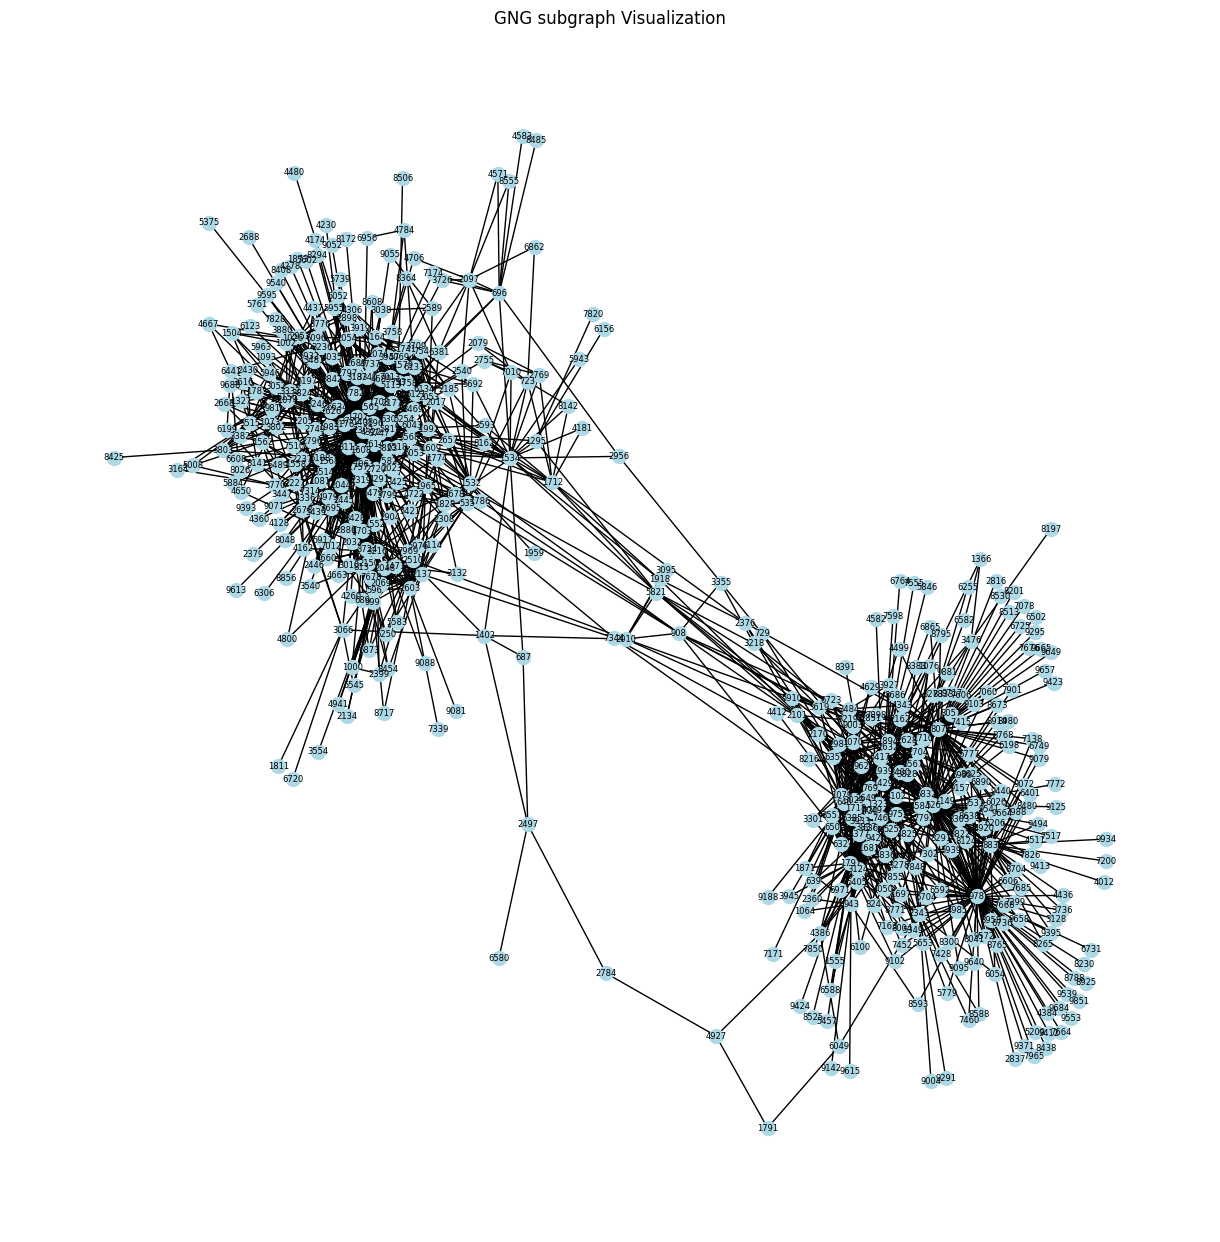

In [ ]:
# Draw subgraph
plt.figure(figsize=(12, 12))
nx.draw(sG_GNG, with_labels=True, node_size=100, node_color='lightblue', font_size=6)
plt.title("GNG subgraph Visualization")
plt.show()

# Core operations in GNNs: Message passing and node aggregation

## Background: CNNs and GNNs

Now that we've looked at our data, we are ready to examine the basic operations of a GNN. At it's heart a GNN is quite similar to a CNN (Convolutional Neural Network) except in the details of how information is aggregated between nodes.

In a CNN, a 2D convolution kernel of a fixed size is used to construct a weighted average of pixel values over a certain region of an image, and that weighted average is passed on to the next layer of the neural network. This idea is depicted in the image below.

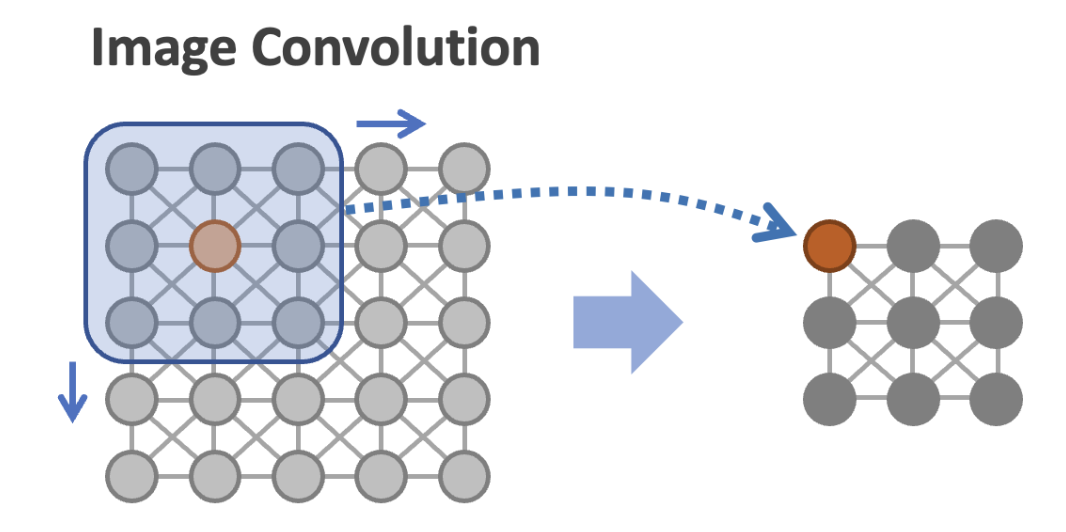

*Image Source: [Graph Neural Networks with PyG on Node Classification, Link Prediction, and Anomaly Detection ](https://towardsdatascience.com/graph-neural-networks-with-pyg-on-node-classification-link-prediction-and-anomaly-detection-14aa38fe1275/)*

In a GNN, this same operation occurs, but the kernel now considers nodes connected by an edge to the node of interest. Just like a CNN, in a GNN, information (i.e., node features) from adjacent nodes are weighted by this kernel and then passed on to the next layer! This is depicted in the image below.

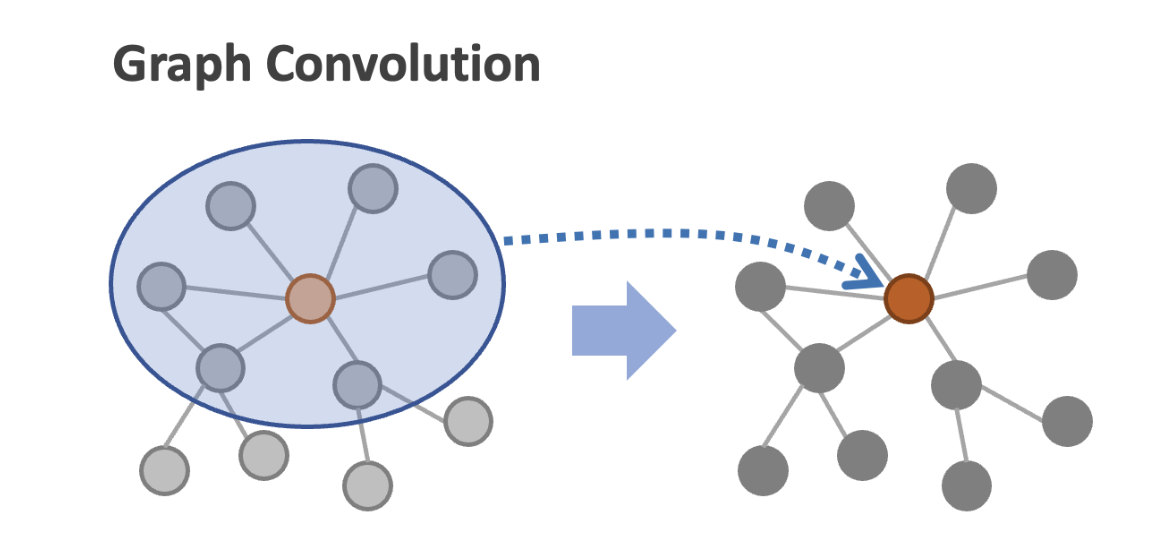

Images Source: [Graph Neural Networks with PyG on Node Classification, Link Prediction, and Anomaly Detection ](https://towardsdatascience.com/graph-neural-networks-with-pyg-on-node-classification-link-prediction-and-anomaly-detection-14aa38fe1275/)

And just like a CNN, the deeper your GNN, the wider the convolutional kernel becomes, allowing for greater aggreation across nodes, as shown below.

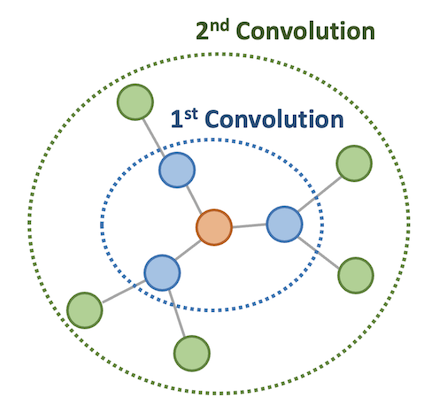

Images Source: [Graph Neural Networks with PyG on Node Classification, Link Prediction, and Anomaly Detection ](https://towardsdatascience.com/graph-neural-networks-with-pyg-on-node-classification-link-prediction-and-anomaly-detection-14aa38fe1275/)

## Math 😱

This operation is the core of a GNN, and kind of the defining feature of the most vanilla GNN around, the Graph Convolutional Network (GCN). Let's go through some of the math on message passing and aggregration (i.e., the convolultion on a graph) as described in [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907) that introduced the GCN layer.

If we focus on node $i$, the GCN convolution is defined by:
$$ x^{(\ell + 1)}_i = \sigma \left( \frac{1}{|d_i|}\sum_{j \in d_i}  Wx^{(\ell)}_j \right) \, $$

where $|d_i|$ is the degree of node $i$, $d_i$ is a list of node $i$'s edges, and $W$ is a learnable weight matrix of shape $F_{out} \times F_{in}$. ($F$ for 'features'). $\sigma(\cdot)$ is a non-linear activation function (e.g., ReLU or tanh) and $x^{(\ell + 1)}_i$ is node $i$'s features at the next GCN layer.

In other words, we simply compute a weighted average of the features of all node $i$'s neighbors.

For all $N$ nodes, we can express this in a more compact matrix notation as:

$$X^{(\ell + 1)} = \sigma(D^{-1}AX^{(\ell)}W^T) $$

where $A$ is the $N \times N$ adjacency matrix, $X$ is the $N \times F_\text{in}$ feature matrix (where each node has an $F_\text{in}$-dimensional feature vector) and $D$ is a diagonal degree matrix. The degree matrix $D$ is a diagonal matrix with $D_{ii} = \sum_jA_{ij}$, (the number of neighbors, aka degree, of node $i$).


($D^{-1}$ arises due to the $\frac{1}{|d_i|}$ in the above expression.)

$X^{(\ell + 1)}$ holds the output node features at the next layer ($N \times F_\text{out}$).



**Symmetric Normalization**

Note that the nodes will likely have different degrees, i.e., different numers of neighbors. This could lead to instabilities during neural network training, e.g., exploding or vanishing gradients. To address this, normalization is commonly used, e.g., the $\frac{1}{|d_i|}$ added above.

To take both the in and out degrees into account (for directed graphs), a common practice is to use symmetric normalization (as proposed by [Kipf and Welling](https://arxiv.org/abs/1609.02907)). Symmetric normaliztion 'distributes' the $D^{-1}$ term in the above expression to both the left and right side of the adjacency matrix, leading to the following expression for the message passing step:

$$X^{(\ell + 1)} = \sigma(D^{-\frac{1}{2}}AD^{-\frac{1}{2}}X^{(\ell)}W^T) $$


## A simple message passing example

To get familiar with the message passing step, let's create a dummy edge index tensor to perform message passing on. We'll use a built in PyG method, and also build our own!

<font color='red'> Run the cell below to create a edge_index tensor for a basic graph, use NetworkX to construct a graph object from it, and then plot it. </font

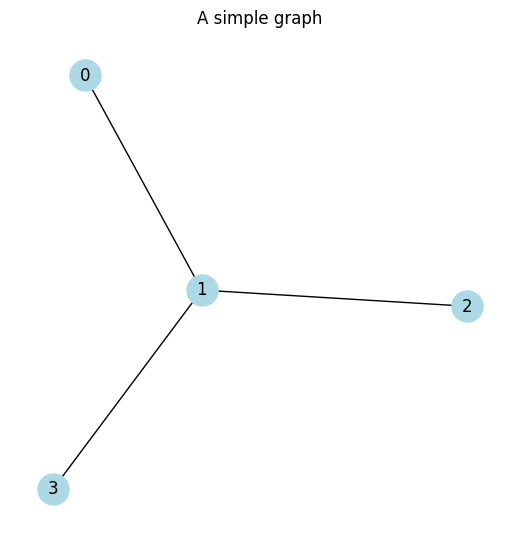

In [ ]:
edge_index = torch.tensor([
    [0, 1, 1, 1, 2, 3],
    [1, 0, 2, 3, 1, 1]], dtype=torch.long)

G = nx.from_edgelist(edge_index.t().tolist())

plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=12)
plt.title("A simple graph")
plt.show()

First, let's construct the adjacency matrix $A$ from our edge_index. Luckily PyG has a handy function to do that [`to_dense_adj`](https://pytorch-geometric.readthedocs.io/en/2.4.0/_modules/torch_geometric/utils/to_dense_adj.html).

<font color='red'> Run the cell below import the method and construct $A$. </font>

In [ ]:
from torch_geometric.utils import to_dense_adj

# Get the dense adjacency matrix using to_dense_adj function
A = to_dense_adj(edge_index)[0]

# Print the dense adjacency matrix
print("Dense Adjacency Matrix:")
print(A)

Dense Adjacency Matrix:
tensor([[0., 1., 0., 0.],
        [1., 0., 1., 1.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])


<font color='red'>PROBLEM 6: Compute $D$ from $A$. Look at the definition above 😀. </font>

In [ ]:
# Degree matrix (D)
D = A.sum(dim=1)

Next, we need some node features, $X$ and some weights $W$.

<font color='red'> Run the cell below to make these. </font>

In [ ]:
# Node features
X = torch.tensor([
    [1.0, 0.0],
    [0.0, 1.0],
    [1.0, 1.0],
    [0.0, 0.0]])

# Weights
W = torch.tensor([
    [0.1, 0.2, 0.3],
    [0.4, 0.5, 0.6]], dtype=torch.float)

Now let's put it all together!

<font color='red'>PROBLEM 7: Write a function called `my_gcn` that takes $X^{(\ell)}$, $A$, $W$, and $D$ as inputs and returns $X^{(\ell + 1)}$.</font>

In [ ]:
def my_gcn(X, A, W, D):

    D_inv_sqrt = D.pow(-0.5)  # Inverse square root of the degree

    # Normalize the adjacency matrix (A_hat = D^-0.5 * A * D^-0.5)
    norm_adj_matrix = D_inv_sqrt.view(-1, 1) * A * D_inv_sqrt.view(1, -1)

    # Linear transformation (X * W)
    X = X @ W  # "@" does matrix multiplication in Python

    # Message passing step (A_hat * X)
    Xprime = norm_adj_matrix @ X

    return Xprime

In [ ]:
my_Xprime = my_gcn(X, A, W, D)

That seems like an awful lot of work. Can't PyTorch Geometric make my life easier? Definitely!

PyG has a built in GCN module called [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv). It allows you to easily define a Graph Convolutional Network by specifying input and output channels for your node features. The forward pass automatically handles message passing and neighbor aggregation to compute updated node embeddings. Isn't PyG wonderful!

<font color='red'> Run the cell below to import this, make a GCN instance with the correct options, and with $W$ correctly integrated into it. </font>

In [ ]:
from torch_geometric.nn import GCNConv

# Create PyG GCNConv layer
gcn = GCNConv(in_channels=2, out_channels=3, bias=False, add_self_loops=False)

with torch.no_grad():
    gcn.lin.weight.copy_(W.T)

Now, let's apply the PyG GCN on $X$ and the edge index to see what it does!

<font color='red'>PROBLEM 8: Apply GCN to $X$ and `edge_index`.</font>

In [ ]:
pyg_Xprime = gcn(X, edge_index)

Now check that they are the same! (Or at least close to each other).

In [ ]:
print("My GCN Output:\n", my_Xprime)
print("\nPyG GCNConv Output:\n", pyg_Xprime)

print("\nAre they close?", torch.allclose(my_Xprime, pyg_Xprime, atol=1e-5))

My GCN Output:
 tensor([[0.2309, 0.2887, 0.3464],
        [0.3464, 0.5196, 0.6928],
        [0.2309, 0.2887, 0.3464],
        [0.2309, 0.2887, 0.3464]])

PyG GCNConv Output:
 tensor([[0.2309, 0.2887, 0.3464],
        [0.3464, 0.5196, 0.6928],
        [0.2309, 0.2887, 0.3464],
        [0.2309, 0.2887, 0.3464]], grad_fn=<ScatterAddBackward0>)

Are they close? True


Phew! Same thing!

# Training Graph Neural networks: Different types of tasks

Now that we looked at our data, and are familiar with the ways its organized in PyG, and understand the core math behind GNNs, let's talk about what they can do. The three big tasks most often explored with GNNs are node classifcation, link prediction, and graph classification. Today we will explore node classification, because it's the most basic and straightforward. Obviously link and graph tasks are cool too! See the additional resources section below for other tutorials that explore these tasks.

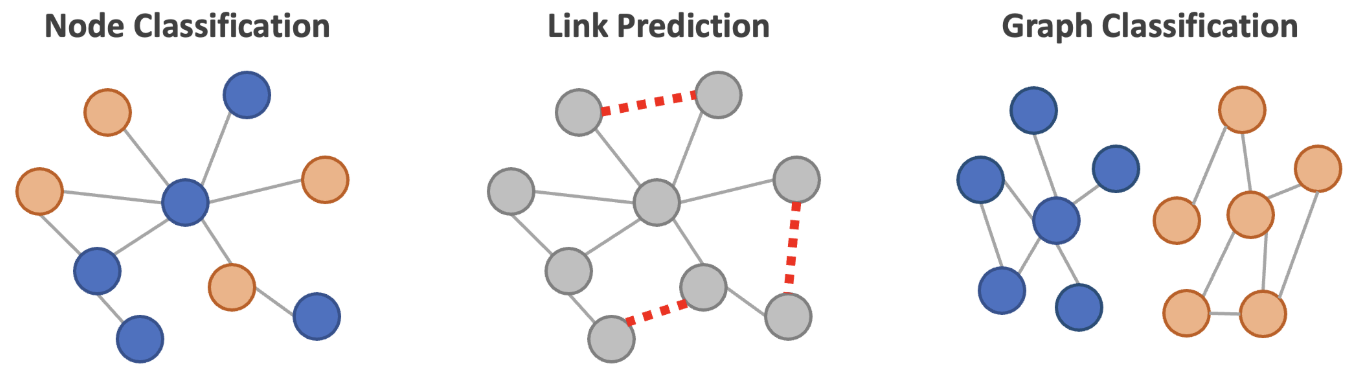

*Images Source: [Graph Neural Networks with PyG on Node Classification, Link Prediction, and Anomaly Detection ](https://towardsdatascience.com/graph-neural-networks-with-pyg-on-node-classification-link-prediction-and-anomaly-detection-14aa38fe1275/)*

**Node classification**

Node classification tasks are where node features are learned. For examples, in the above figure, each node has a unique label (color) and we might want to learn these. GNNs are good at these tasks because the message passing operations can combine features of some nodes along the edges that connect nodes. The task we will explore below is an example of a node classification task: if I know the cell classes of some cells in a connectome graph, can I predict the cell types for cells that lack class labels?

**Link prediction**

Link prediction seeks to predict if an edge should exist between two nodes. In the above figure, this would be like predicting if edges exists as depicted by the dotted red lines. For example, imagine a citation network: a graph where each node is research paper, and edges represent citations between papers. Node features could be the frequency of words in your paper, and the job of the GNN would be to use known edges and node features to predict which papers your new paper should cite! (In fact, this dataset is a real thing, called the ['Cora' dataset](https://paperswithcode.com/dataset/cora).

**Graph classification**

A graph classification task is one where a GNN processes more than one graph, and it must classify them used node, edge, and global features of the graph. In the above figure, this would be like classifying the blue vs. the orange graph, based on some properties. For example, at this workshop we heard a presentation by a speaker using GNNs to study chemosentation. A graph classification task could be to process a large chemical dataset, representing each compound by a graph, where nodes contain atomic information, and predict the smell of each chemical.

# Training a Graph Convolution Network (GCN)

Now we are ready to train our GNN!

We are going to train a GCN to perform a node classification task. In this task we will attemp to predict the `super_class` label of each node in our training dataset, for both the SMP and the GNG graphs. How will our network be able to do this?

The data for each brain region was organized in the following way (in the special `graph` data structures you imported above):

* The label for each node was encoded as a [one hot vector](https://en.wikipedia.org/wiki/One-hot) in each node's features, `graph.x`
* 25% of the nodes were used as a validation set, set in `graph.val_mask`.
* 25% were used for the test set, in `graph.test_mask`.
* **The features for the test and validation sets were set to all zeros, to remove signatures of the labels in their features**.
* The remaining 50% of nodes were used in the training set, set in `graph.train_mask`.
* **20% of the training nodes were corrupted by setting their features to all zeros, thus removing the signature of the label.**

So, there is a 'signature' of each node's class represented in their node features. Some of the training nodes and all of the test and validation nodes lack this signature, but these nodes **are** connected to some training nodes that still have them. The idea is, that through the message passing operation, these features will be learned in these 'zero-ed out nodes', via the nodes they are connected to, thereby improving both training performance and also testing performance.

This is visually depicted in the figure below. At network initialization, node 2 is in the training set but its features were corrupted. Nodes 1, 2, and 4 are of the same class (3, blue) so node 2 and 4 have the same features. Node 3 and 5 are in the same class (2, orange), but node 5 is in the test set (blue ring) so it doesn't have features either.

After training, node 5 has acquired some features from its neighboring nodes, giving it correct features. As the weights were learned to improve prediction on the training nodes (e.g., 2) the features have also improved for node 5, and test performance improves too!

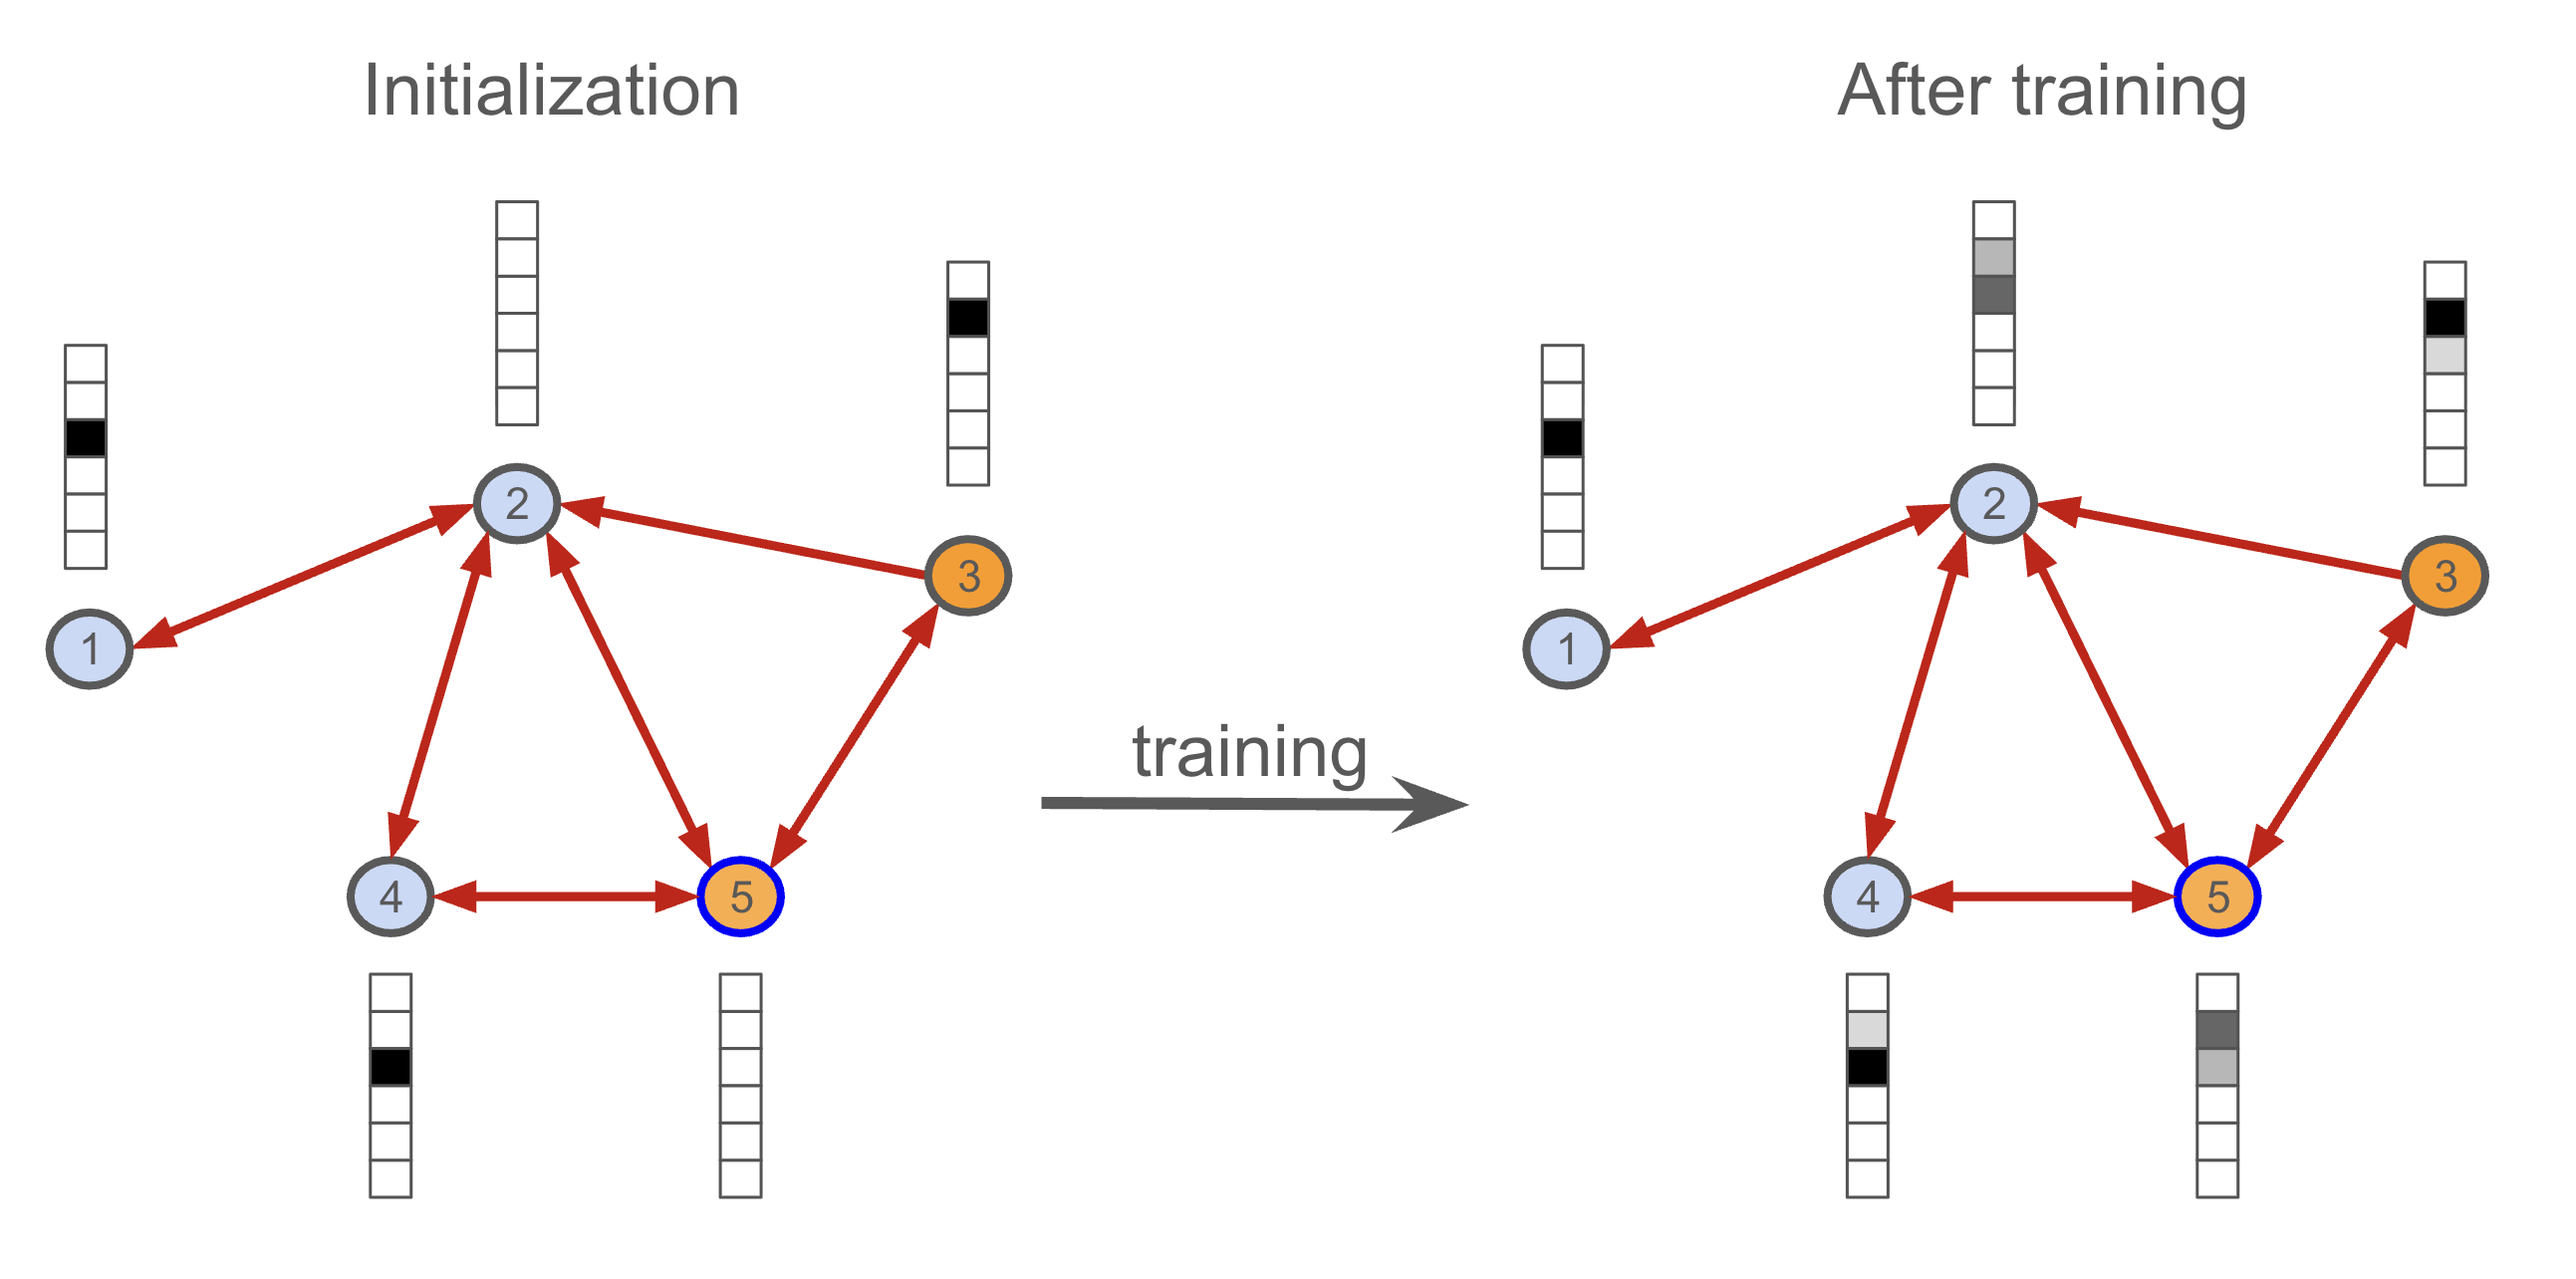

<font color='red'>Run the cell below to confirm that rougly 20% of the training nodes in the GNG dataset have no features.</font>

In [ ]:
(torch.sum(graph_GNG.x[graph_GNG.train_mask], dim=1) == False).float().mean()

tensor(0.1999)

<font color='red'>Run the 2 cells below to set `graph` to the graph for the brain region you want to fit, and then compute the `num_classes` and `num_features` for that dataset. These two variables are used in the GCN methods, below.</font>

<font color='red'> **NOTE THE COMMENTED LINE HERE, `graph=graph_SMP`. This is here for you to run the GCN and GAT models later on the second dataset, to do a comparision**</font>

In [ ]:
#graph = graph_GNG
graph = graph_SMP

In [ ]:
num_classes = len(graph.y.unique())
num_features = graph.x.shape[1]

We are going to construct a 2 layer GCN. Below we depict the various steps that will occur throughout the GNN. Our initial graph features `graph.x` are processed through the message passing layer (just like we constructed above!), passed through a nonlineartiy (e.g., ReLU, or tanh), at which point we a have a new matrix $X$ which now may have a different feature dimension. We then pass this through another GCN and nonlinearity, to produce the final graph features. These are passed through a softmax function to produce predictions for each node's label.

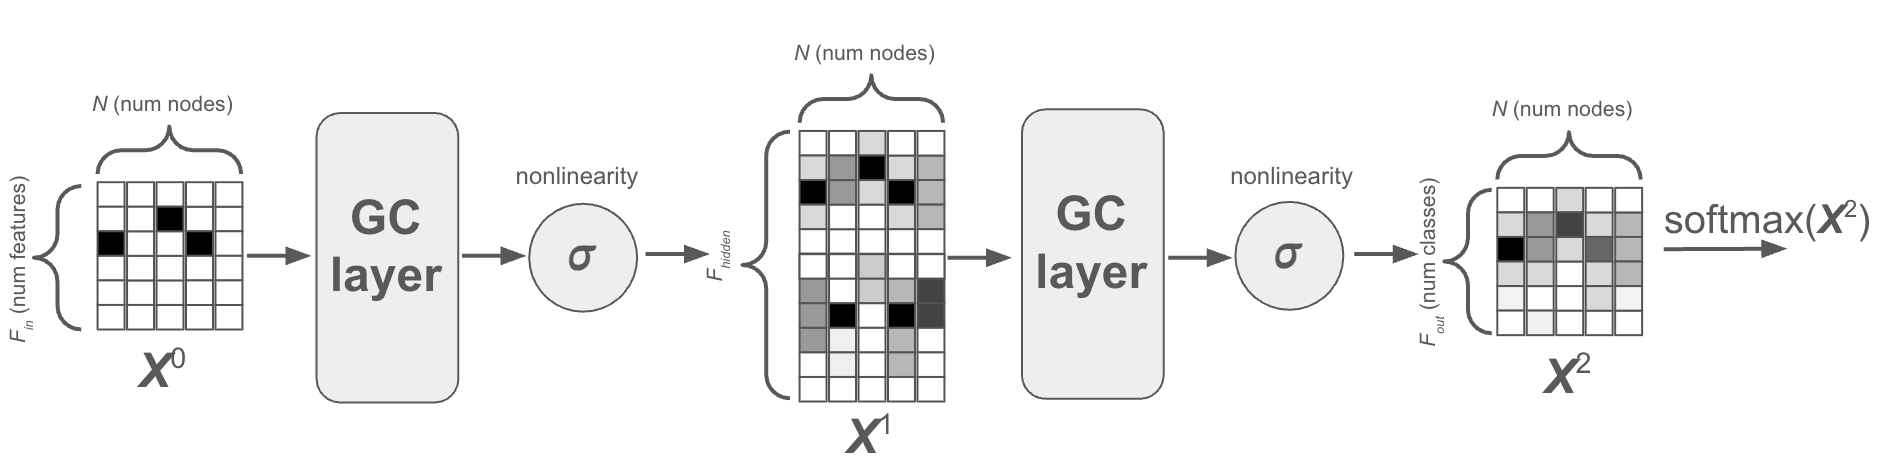

And now we are really going to start to exploit the power of PyG. We can't summarize all of PyG's awesome here (check the [documnetation](https://pytorch-geometric.readthedocs.io/en/latest/index.html) for that) but briefly, PyG is great because it

* provides a wide array of message passing primitives for tasks such as node classification, link prediction, and graph classification.
* it has an extensive set of GNN layers, transforms, and utilities that supports flexible experimentation across diverse graph tasks
* it optimizes large-scale graph computations by harnessing GPU acceleration and advanced sampling techniques to handle real-world graph datasets efficiently
* has a set of commonly used methods and classes, such as  `Data` for handling graph structures, `DataLoader` for batching, `GCNConv` for graph convolution, and `SAGEConv` for neighborhood aggregation, that will make your life easier!

Let's create an instance of our 2 layer GCN using PyG!

<font color='red'>Run the cell below to construct the 2 layer GCN.</font>

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.2, training=self.training)  # Dropout only active during training
        x = self.conv2(x, edge_index)
        return x

Because we don't have the same number of examples for each class, we want to weight the loss function respecting the frequency of each class. This will ensure that the model endeavors to learn classes with a small number of examples.

<font color='red'>Run the cell below to compute the class weights.</font>

In [ ]:
# Compute class weights
label_counts = torch.bincount(graph.y[graph.train_mask])
class_weights = 1.0 / label_counts.float()
class_weights = class_weights / class_weights.sum()  # normalize if you want

Finally, we need to construct a loss function and an optimizer, and `train` and `test` methods for our model. We won't do anything too out of the ordinary here: we'll use a [cross entropy loss](https://en.wikipedia.org/wiki/Cross-entropy), and [Adam](https://arxiv.org/abs/1412.6980) optimizer, and pretty standard `train` and `testing` routines. Again, notice how easy PyG makes some of these steps!

<font color='red'>Run the cell below to initialize the model with 16 hidden features, construct a cross entropy loss function, appropriate for a multiclass classification problem, and `train` and `test` methods to train and test our model!</font>

In [ ]:
import torch.nn.functional as F

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x, graph.edge_index)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.

      # --- Validation error ---
      model.eval()  # switch to eval mode (disables dropout, etc.)
      with torch.no_grad():
            pred = out.argmax(dim=1)
            val_pred = pred[graph.val_mask]
            val_true = graph.y[graph.val_mask]
            val_acc = (val_pred == val_true).float().mean().item()

      return loss.item(), val_acc

def test():
      model.eval()
      out = model(graph.x, graph.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

Now let's train the model for 500 epochs!

<font color='red'>Run the cell below run the training loop!</font>

In [ ]:
for epoch in range(1, 501):
    loss, val_acc = train()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, validation accuracy: {val_acc:.4f}')

Epoch: 010, Loss: 1.7421, val_acc: 0.3109
Epoch: 020, Loss: 1.6907, val_acc: 0.4145
Epoch: 030, Loss: 1.6039, val_acc: 0.2072
Epoch: 040, Loss: 1.5382, val_acc: 0.2403
Epoch: 050, Loss: 1.4599, val_acc: 0.2683
Epoch: 060, Loss: 1.4145, val_acc: 0.2104
Epoch: 070, Loss: 1.3596, val_acc: 0.2161
Epoch: 080, Loss: 1.3547, val_acc: 0.2587
Epoch: 090, Loss: 1.3208, val_acc: 0.2498
Epoch: 100, Loss: 1.2786, val_acc: 0.2994
Epoch: 110, Loss: 1.2371, val_acc: 0.3134
Epoch: 120, Loss: 1.2406, val_acc: 0.3210
Epoch: 130, Loss: 1.2336, val_acc: 0.3706
Epoch: 140, Loss: 1.2045, val_acc: 0.3420
Epoch: 150, Loss: 1.2118, val_acc: 0.3675
Epoch: 160, Loss: 1.1884, val_acc: 0.3636
Epoch: 170, Loss: 1.1584, val_acc: 0.3808
Epoch: 180, Loss: 1.1508, val_acc: 0.3503
Epoch: 190, Loss: 1.1488, val_acc: 0.4189
Epoch: 200, Loss: 1.1302, val_acc: 0.4317
Epoch: 210, Loss: 1.1108, val_acc: 0.4050
Epoch: 220, Loss: 1.1051, val_acc: 0.4043
Epoch: 230, Loss: 1.0642, val_acc: 0.4100
Epoch: 240, Loss: 1.0922, val_acc:

Lastly, let's see how well our model is doing on the test dataset, the real test of our model performane! We'll run our data through the model, and compare the predicted labels on the test data against the real labels. We'll use the method [`classfication_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from sklearn to get some handy metrics for classification tasks.

<font color='red'>Run the 2 cells below to compute test performance, and to save the f1-score (which balances precision and recall) for the brain region you are studying.</font>

In [ ]:
from sklearn.metrics import classification_report

y_pred = model(graph.x, graph.edge_index).argmax(dim=1)
y_true = graph.y

# Use the test mask to slice out test nodes
y_pred_test = y_pred[graph.test_mask]
y_true_test = y_true[graph.test_mask]

# Classification report (includes precision, recall, F1 per class)
report = classification_report(y_true_test.cpu(), y_pred_test.cpu(), digits=3, output_dict=True)
# Convert the classification report into a Pandas DataFrame
df_report = pd.DataFrame(report).transpose()

# Print the DataFrame
print("Classification Report as DataFrame:\n", df_report)

Classification Report as DataFrame:
               precision    recall  f1-score      support
0              0.000000  0.000000  0.000000    10.000000
1              0.958686  0.596966  0.735772  1516.000000
2              0.000000  0.000000  0.000000    16.000000
3              0.013699  0.083333  0.023529    12.000000
4              0.005115  0.333333  0.010076     6.000000
5              0.000000  0.000000  0.000000    13.000000
accuracy       0.577241  0.577241  0.577241     0.577241
macro avg      0.162917  0.168939  0.128230  1573.000000
weighted avg   0.924071  0.577241  0.709328  1573.000000


<font color='red'> **Be sure you assign the correct brain region to the new variables below!** *italicized text*</font>

In [ ]:
#f1_weighted_GCN_GNG = report["weighted avg"]["f1-score"]
#f1_weighted_GCN_GNG
f1_weighted_GCN_SMP_R = report["weighted avg"]["f1-score"]
f1_weighted_GCN_SMP_R

0.7093284810239181

How did the model do?!

<font color='red'> **Now, go back to the top, and do the same thing for the other brain region!**</font>

# Graph Attention Networks (GATs)

GCNs are impressive, but it was quickly realized that we can augment our basic GCN to get improved performance. Like other models, adding [attention](https://en.wikipedia.org/wiki/Attention_(machine_learning)) significantly improves performance by enabling more refined interactions between nodes and reducing oversmoothing. This led to the proposal of the [Graph Attention Network](https://arxiv.org/abs/1710.10903), or GAT.

Below is how attention heads (in this case 3) were depicted in the original Graph Attention Network paper, to illustrate how attention is mediated between nodes in a GNN.

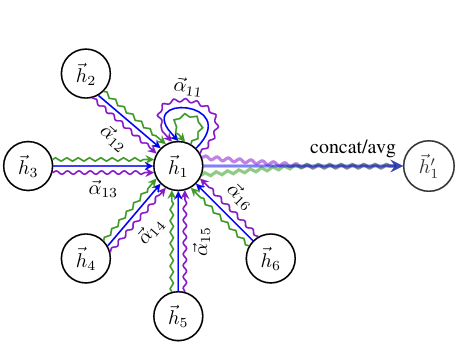

*Images Source: [Graph Attention Networks
](https://arxiv.org/abs/1710.10903)*

Let's use PyG to build, train, and test a GAT, using the [GATConv](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.conv.GATConv.html) method. Below, we set the number of attention heads to 8, but feel free to play with this parameter in increase or decrease performance.

<font color='red'>Run the cells below to construct a GAT, its `train` and `test` methods, run a training loop, and compute the test performance. Run it for both brain regions.</font>

In [ ]:
from torch_geometric.nn import GATConv

# Assuming num_features and num_classes are defined globally
# e.g., num_features = dataset.num_features, num_classes = dataset.num_classes

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(num_features, hidden_channels, heads=8, dropout=0.0)
        # Output dim of conv1 is hidden_channels * heads, so we set in_channels accordingly
        self.conv2 = GATConv(hidden_channels * 8, num_classes, heads=1, concat=False, dropout=0.0)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.5, training=self.training)  # Dropout only active during training
        x = self.conv2(x, edge_index)
        return x

In [ ]:
model = GAT(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x, graph.edge_index)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.

      # --- Validation error ---
      model.eval()  # switch to eval mode (disables dropout, etc.)
      with torch.no_grad():
            pred = out.argmax(dim=1)
            val_pred = pred[graph.val_mask]
            val_true = graph.y[graph.val_mask]
            val_acc = (val_pred == val_true).float().mean().item()

      return loss.item(), val_acc

def test():
      model.eval()
      out = model(graph.x, graph.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

In [ ]:
for epoch in range(1, 501):
    loss, val_acc = train()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, validation accuracy: {val_acc:.4f}')

Epoch: 010, Loss: 1.5376, val_acc: 0.4412
Epoch: 020, Loss: 1.3871, val_acc: 0.3738
Epoch: 030, Loss: 1.2287, val_acc: 0.4043
Epoch: 040, Loss: 1.0779, val_acc: 0.4139
Epoch: 050, Loss: 0.8394, val_acc: 0.3929
Epoch: 060, Loss: 0.7035, val_acc: 0.4965
Epoch: 070, Loss: 0.6284, val_acc: 0.5257
Epoch: 080, Loss: 0.5845, val_acc: 0.5397
Epoch: 090, Loss: 0.6080, val_acc: 0.6345
Epoch: 100, Loss: 0.5941, val_acc: 0.5830
Epoch: 110, Loss: 0.5728, val_acc: 0.6173
Epoch: 120, Loss: 0.5533, val_acc: 0.6592
Epoch: 130, Loss: 0.5400, val_acc: 0.6154
Epoch: 140, Loss: 0.5323, val_acc: 0.5906
Epoch: 150, Loss: 0.5474, val_acc: 0.6052
Epoch: 160, Loss: 0.5826, val_acc: 0.6249
Epoch: 170, Loss: 0.5228, val_acc: 0.5798
Epoch: 180, Loss: 0.5158, val_acc: 0.6872
Epoch: 190, Loss: 0.5027, val_acc: 0.6929
Epoch: 200, Loss: 0.5154, val_acc: 0.6268
Epoch: 210, Loss: 0.5193, val_acc: 0.6516
Epoch: 220, Loss: 0.5192, val_acc: 0.7095
Epoch: 230, Loss: 0.4671, val_acc: 0.6573
Epoch: 240, Loss: 0.5260, val_acc:

In [ ]:
y_pred = model(graph.x, graph.edge_index).argmax(dim=1)
y_true = graph.y

# Use the test mask to slice out test nodes
y_pred_test = y_pred[graph.test_mask]
y_true_test = y_true[graph.test_mask]

# Classification report (includes precision, recall, F1 per class)
report = classification_report(y_true_test.cpu(), y_pred_test.cpu(), digits=3, output_dict=True)
# Convert the classification report into a Pandas DataFrame
df_report = pd.DataFrame(report).transpose()

# Print the DataFrame
print("Classification Report as DataFrame:\n", df_report)

Classification Report as DataFrame:
               precision    recall  f1-score      support
0              0.000000  0.000000  0.000000    10.000000
1              0.962963  0.823219  0.887624  1516.000000
2              0.040000  0.187500  0.065934    16.000000
3              0.014925  0.083333  0.025316    12.000000
4              0.000000  0.000000  0.000000     6.000000
5              0.000000  0.000000  0.000000    13.000000
accuracy       0.795931  0.795931  0.795931     0.795931
macro avg      0.169648  0.182342  0.163146  1573.000000
weighted avg   0.928589  0.795931  0.856324  1573.000000


<font color='red'> **Be sure you assign the correct brain region to the new variables below!** *italicized text*</font>

In [ ]:
#f1_weighted_GAT_GNG = report["weighted avg"]["f1-score"]
#f1_weighted_GAT_GNG
f1_weighted_GAT_SMP_R = report["weighted avg"]["f1-score"]
f1_weighted_GAT_SMP_R

0.8563238613135419

# Compare models across both brain regions

<font color='red'>PROBLEM 9: Plot the f1 score for both models and both brain regions. Your plot should looke something like this:</font>

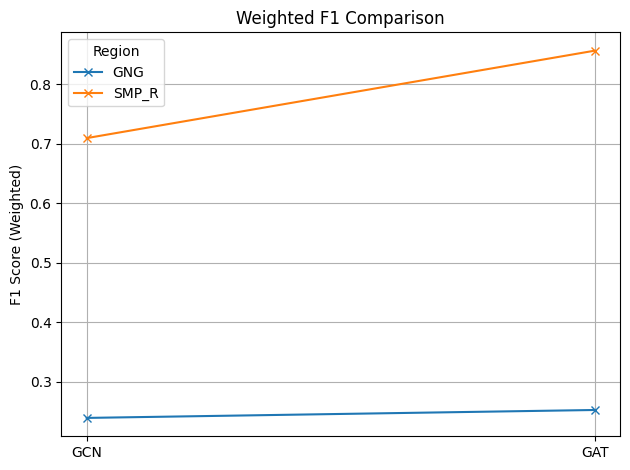

In [ ]:
plt.plot([f1_weighted_GCN_GNG, f1_weighted_GAT_GNG], "x-", label="GNG")
plt.plot([f1_weighted_GCN_SMP_R, f1_weighted_GAT_SMP_R], "x-", label="SMP_R")

plt.xticks([0, 1], ["GCN", "GAT"])
plt.ylabel("F1 Score (Weighted)")
plt.title("Weighted F1 Comparison")
plt.legend()
plt.legend(title="Region")
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusions**


*   The GAT outperforms the GCN for both datasets. To be expected! [Attention is all you need!](https://arxiv.org/abs/1706.03762)
*   Performance on SMP is way better than GNG. Why is that?



# Label propagation

GNNs aren't the only way to go. Other methods that operate on graphs but are not neural networks have been around for a long time and they are also helpful. One of these methods is called [label propagation](https://en.wikipedia.org/wiki/Label_propagation_algorithm). Basically the idea behind label propagation is to use the known node labels and pass them through the adjacency matrix between nodes to predict the missing labels. The mathematical equation describing the transition from layer to layer in a label propagation algorithm is:

$$Y^{(\ell + 1)} = \alpha D^{-\frac{1}{2}}AD^{-\frac{1}{2}}Y^{(\ell)} + (1 - \alpha) Y^{(\ell)} $$

where $D$ and $A$ are defined as above, and $Y$ is an $N$-dimensional array of labels. This should look pretty familiar, except we are operating on labels now, not node features!

Luckily PyG has an implementation called [LabelPropagation](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.nn.models.LabelPropagation.html) that will allow us to understand how an non-neural network but graph based method could do on this task.

<font color='red'> Run the cells on both the GNG and SMP data to see how label propagation does. </font>

In [ ]:
#graph = graph_GNG
graph = graph_SMP

In [ ]:
from torch_geometric.nn.models import LabelPropagation

lp = LabelPropagation(num_layers=10, alpha=0.9)

# Run label propagation
y_pred = lp(graph.y, graph.edge_index, graph.train_mask)

# Convert soft outputs to class predictions
y_pred_labels = y_pred.argmax(dim=1)

# Compute accuracy on test set
acc = (y_pred_labels[graph.test_mask] == graph.y[graph.test_mask]).float().mean()
print(f"Label Propagation Accuracy: {acc:.4f}")


Label Propagation Accuracy: 0.7839


Interesting! So we are getting roughly the same performance using label propagation as using our GNNs, which makes sense -- we are basically doing label propagation via the node features!

# Why are we getting such different levels of performance for different brain regions?

It seems strange the we get such drastically different performance on data from the two brain regions. Why might this be?

Recall that node classification is possible because the features "spread" via the edges from the training nodes to the testing/validation nodes via the message passing during training, enabling label prediction on the testing nodes. This only seems likely to work if nodes that are connected by edges, in fact, share the same labels! Can we test for this?

For a graph, the degree to which connected nodes share labels is denoted by how [*homophilic*](https://en.wikipedia.org/wiki/Heterophily) a graph is. If a graph is highly homophilic, then connected nodes are likley to share a class. A graph with low homophiliy (or a heterophilic graph) means that connected nodes are not likely to have similar features.

**For a heterophilic graph, node classification by message passing won't work very well, because the edges pass information between dissimiliar nodes.** Maybe that's what's going on in GNG?

<font color='red'>PROBLEM 10: Write a function to compute the homophily of a graph. To do this, compute the ratio of the number of edges for which both nodes share the same level to the total number of edges.</font>


In [ ]:
def compute_homophily(edge_index, y):
    # Ensure edge_index is undirected
    row, col = edge_index
    same_label = (y[row] == y[col])
    return same_label.sum().item() / edge_index.size(1)

In [ ]:
graph = graph_GNG
homophily = compute_homophily(graph_GNG.edge_index, graph_GNG.y)
print(f"GNG Homophily: {homophily:.4f}")

GNG Homophily: 0.3054


In [ ]:
graph = graph_SMP
homophily = compute_homophily(graph_SMP.edge_index, graph_SMP.y)
print(f"SMP Homophily: {homophily:.4f}")

SMP Homophily: 0.9326


Eureka! That explains it! Message passing wasn't working that well for GNG because nodes with different `super_class` labels are relatively highly connected! I wonder if that's a special property of the GNG?!

Let's replot our subgraphs for each brain region, as we did above, but color each node based on its label, to see if similar labels cluster together!

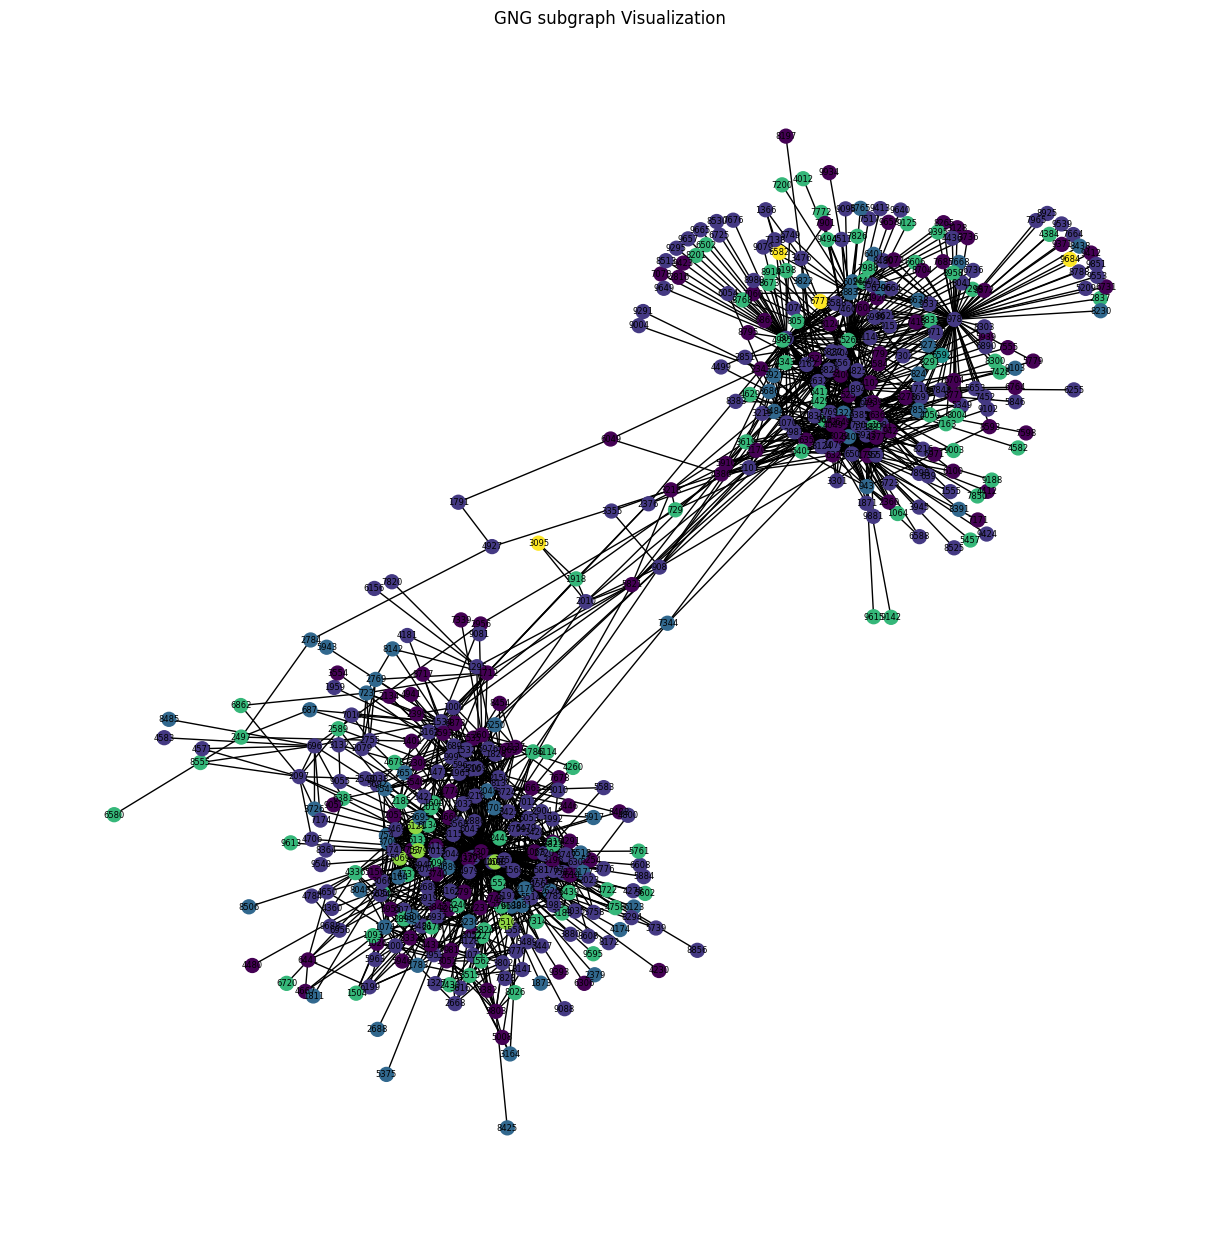

In [ ]:
plt.figure(figsize=(12, 12))
nx.draw(sG_GNG, with_labels=True, node_size=100, node_color=graph_GNG.y[list(sG_GNG.nodes())], cmap=plt.cm.viridis, font_size=6)
plt.title("GNG subgraph Visualization")
plt.show()

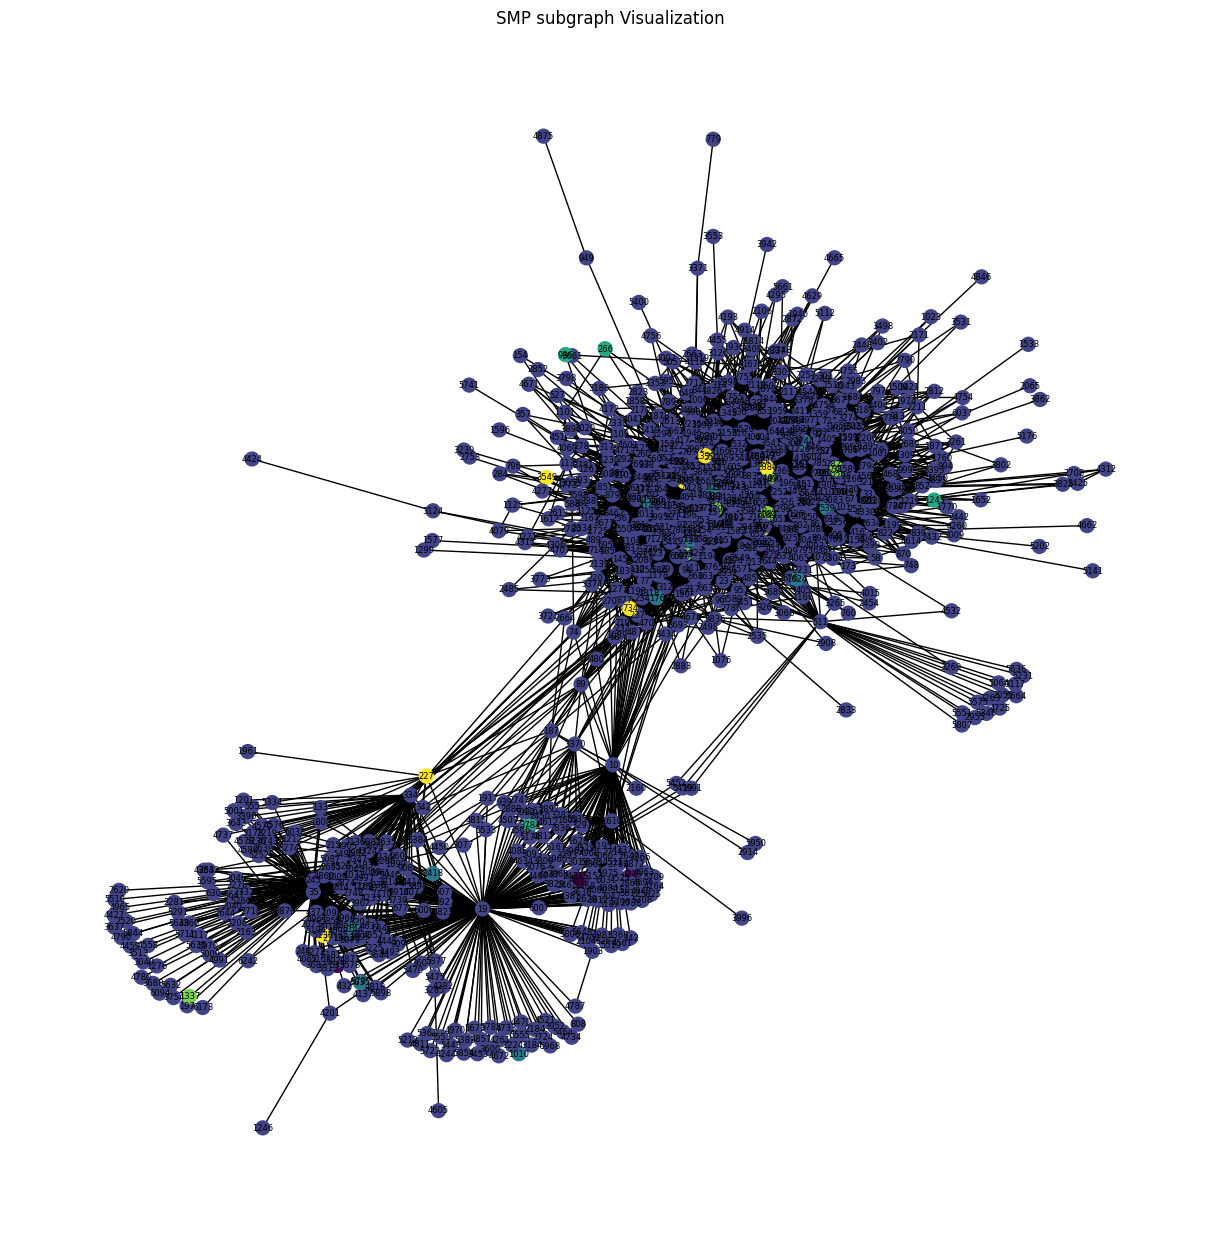

In [ ]:
plt.figure(figsize=(12, 12))
nx.draw(sG_SMP, with_labels=True, node_size=100, node_color=graph_SMP.y[list(sG_SMP.nodes())], cmap=plt.cm.viridis, font_size=6)
plt.title("SMP subgraph Visualization")
plt.show()

Sure looks like it!

# Extra Credit!

The FlyWire dataset is bursting with features for each cell that might help node learning (or maybe edge or graph classification)! Try augmenting our node features with the inferred neurotransmitter for each neuron and see if node prediction gets better!

<font color='red'>Run the cells below to construct a new graph object that includes the neurotransmitter type as a one-hot in the node features.</font>


In [ ]:
# networkx graph -> PyTorch geometric object transformation is easy
G = nx.DiGraph() # Initialize a networkx directed graph
G = nx.from_pandas_edgelist(connections_SMP, 'pre_root_id', 'post_root_id', ['syn_count'], create_using=nx.DiGraph()) # Create a graph with our node and edge information

In [ ]:
from torch_geometric.utils.convert import from_networkx
# Convert graph into PyTorch geometric object
graph_SMP_nt = from_networkx(G, group_edge_attrs=['syn_count']) # Add edge attributes from networkx graph

In [ ]:
graph_SMP_nt.y = torch.from_numpy(np.copy(pd.Categorical(neurons_SMP['super_class']).codes)).long()

In [ ]:
import torch.nn.functional as F

graph_SMP_nt.x = F.one_hot(graph_SMP_nt.y, num_classes=num_classes).float()
graph_SMP_nt.x

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])

In [ ]:
# Assuming neurons_SMP and connections_SMP have columns 'root_id' and 'pre_root_id', and
# you want to take 'some_column' from connections_SMP to append to neurons_SMP.

# Step 1: Perform the merge to get matches
matching_df = neurons_SMP.merge(connections_SMP, left_on='root_id', right_on='pre_root_id',
                                 how='left', suffixes=('_neurons', '_connections'))

# Step 2: Extract the desired column from connections_SMP (e.g., 'some_column')
matching_df = matching_df[['root_id', 'nt_type']]

# Step 3: Group by 'root_id' and aggregate 'some_column' values into a list (to handle multiple matches)
matching_df = matching_df.groupby('root_id')['nt_type'].apply(list).reset_index()

# Step 4: Merge the results back to neurons_SMP
neurons_SMP_wnt = neurons_SMP.merge(matching_df, on='root_id', how='left')

#somtimes the neurotransmitters don't agree for a given neuron, so select the most commonly occuring one
from collections import Counter
neurons_SMP_wnt['nt_type'] = [Counter(i).most_common(1)[0][0] for i in neurons_SMP_wnt['nt_type']]

neurons_SMP_wnt

root_id       flow super_class        class sub_class  \
0     720575940633771033  intrinsic     central          NaN       NaN   
1     720575940620922790  intrinsic     central          DAN       NaN   
2     720575940626983185  intrinsic     central          NaN       NaN   
3     720575940616747934  intrinsic     central          NaN       NaN   
4     720575940633716124  intrinsic     central          NaN       NaN   
...                  ...        ...         ...          ...       ...   
6287  720575940622462472  intrinsic     central  Kenyon_Cell       NaN   
6288  720575940626646544  intrinsic     central  Kenyon_Cell       NaN   
6289  720575940615077482  intrinsic     central          NaN       NaN   
6290  720575940626321482  intrinsic     central  Kenyon_Cell       NaN   
6291  720575940611090244  intrinsic     central       LHCENT       NaN   

     cell_type hemibrain_type        hemilineage   side nerve nt_type  
0          NaN         SMP477  DM1_antero_dorsal   left   NaN     ACH  
1          NaN          PAM05       CREa1_dorsal  right   NaN     NaN  
2       CB3695            NaN              FLAa3  right   NaN     ACH  
3       CB1508            NaN             SMPpv1  right   NaN     ACH  
4          NaN         SMP033             SLPal5  right   NaN    GLUT  
...        ...            ...                ...    ...   ...     ...  
6287      KCab         KCab-m               MBp3  right   NaN     ACH  
6288      KCab         KCab-s               MBp2  right   NaN     ACH  
6289       NaN         SMP093             SMPad1   left   NaN    GLUT  
6290       NaN          KCg-m               MBp2  right   NaN     ACH  
6291       NaN        LHCENT8            primary  right   NaN    GABA  

[6292 rows x 11 columns]

In [ ]:
df_one_hot = pd.get_dummies(neurons_SMP_wnt['nt_type'])
df_one_hot

ACH     DA   GABA   GLUT    OCT    SER
0      True  False  False  False  False  False
1     False  False  False  False  False  False
2      True  False  False  False  False  False
3      True  False  False  False  False  False
4     False  False  False   True  False  False
...     ...    ...    ...    ...    ...    ...
6287   True  False  False  False  False  False
6288   True  False  False  False  False  False
6289  False  False  False   True  False  False
6290   True  False  False  False  False  False
6291  False  False   True  False  False  False

[6292 rows x 6 columns]

In [ ]:
one_hot_tensor = torch.tensor(df_one_hot.values, dtype=torch.float32)
one_hot_tensor

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]])

In [ ]:
graph_SMP_nt.x = torch.cat((graph_SMP_nt.x, one_hot_tensor), dim=1)

In [ ]:
graph_SMP_nt.x

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 1., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])

In [ ]:
import torch_geometric.transforms as T

torch.manual_seed(1325)
# Define the transform
transform = T.RandomNodeSplit(split='train_rest', num_val=0.4, num_test=0.4)

# Apply it to your graph
graph_SMP_nt = transform(graph_SMP_nt)

graph_SMP_nt.x[graph_SMP_nt.test_mask] = 0.
graph_SMP_nt.x[graph_SMP_nt.val_mask] = 0.

Now you should be all set to try `graph_SMP_nt` with a GCN or a GAT!

# Some helpful resources

*  [Great introduction to GNNs](https://distill.pub/2021/gnn-intro/)
*  [Paper with implementation details of graph convolutional layers](https://arxiv.org/abs/1609.02907)  
* [Helpful tutorial for node and edge prediction on citation graphs](https://towardsdatascience.com/graph-neural-networks-with-pyg-on-node-classification-link-prediction-and-anomaly-detection-14aa38fe1275)
* [More on graph convolutional operators](https://distill.pub/2021/understanding-gnns/)
* [Deepmind GNN tutorial in Jraph](https://github.com/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Graph_Neural_Networks/Graph_Neural_Networks.ipynb)
* [Awesome example of edge prediction on connectomes from Litwin-Kumar lab](https://github.com/alitwinkumar/connectome_examples/blob/main/gnn_tutorial.ipynb)
* [PyG tutorials, including node and graph classification tasks](https://pytorch-geometric.readthedocs.io/en/2.6.1/get_started/colabs.html)
* [An Introduction to Graph Neural Networks: Models and Application ](https://www.youtube.com/watch?v=zCEYiCxrL_0&t=824s)